In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

In [2]:
Num_plume = []
Num_2D = []
Num_1D = []
Num_dissolved = []

days = np.arange(1,32,1)

FILEDIR = '/n/home12/hongwei/HONGWEI/merra2_2x25_standard_3/'

for i in days:
    Filenames = f'Lagrange_xyz_2015-1-{i}-0:0:0.txt'

    df = pd.read_fwf(FILEDIR+Filenames, header=None)
    Num_plume.append(len(df))
    
    
    num = df[2].value_counts() 
    
    if 2 in num.index:
        Num_2D.append(num[2])
    else:
        Num_2D.append(0)
        
    if 1 in num.index:
        Num_1D.append(num[1])
    else:
        Num_1D.append(0)
            
    if 0 in num.index:
        Num_dissolved.append(num[0])
    else:
        Num_dissolved.append(0)
    
    if sum(num)!=len(df): print('ERROR')
        
    
    if i==31: lifetime = df[1]

In [3]:
File = open(FILEDIR+'Lagrange_xyz_2015-2-1-0:0:0.txt','r')

df = pd.read_fwf(FILEDIR+'Lagrange_xyz_2015-2-1-0:0:0.txt', header=None)


Num_plume.append(len(df))
    
    
num = df[2].value_counts() 
    
if 2 in num.index:
    Num_2D.append(num[2])
else:
    Num_2D.append(0)
        
if 1 in num.index:
    Num_1D.append(num[1])
else:
    Num_1D.append(0)
            
if 0 in num.index:
    Num_dissolved.append(num[0])
else:
    Num_dissolved.append(0)
    
if sum(num)!=len(df): print('ERROR')

(32,
 [12,
  324,
  324,
  324,
  324,
  324,
  324,
  324,
  324,
  324,
  336,
  324,
  324,
  324,
  324,
  324,
  336,
  324,
  324,
  324,
  324,
  324,
  324,
  324,
  324,
  324,
  432,
  432,
  432,
  432,
  432,
  0])

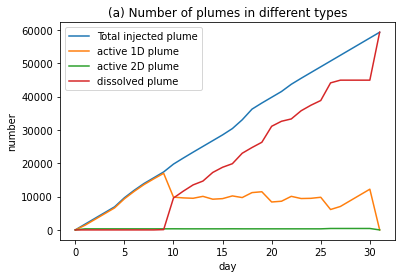

In [8]:
plt.plot(Num_plume, label='Total injected plume')
plt.plot(Num_1D, label='active 1D plume')
plt.plot(Num_2D, label='active 2D plume')
plt.plot(Num_dissolved, label='dissolved plume')

plt.title('(a) Number of plumes in different types')
plt.xlabel('day')
plt.ylabel('number')
plt.legend()
len(Num_2D),Num_2D

2.5

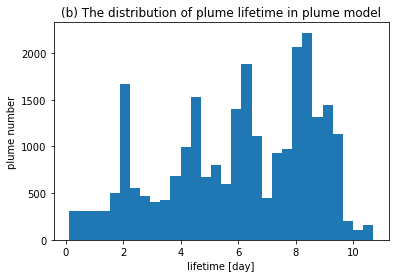

In [9]:
plt.hist(lifetime, bins=30)
plt.xlabel('lifetime [day]');
plt.ylabel('plume number');
plt.title('(b) The distribution of plume lifetime in plume model');
lifetime.min()*24 # hour

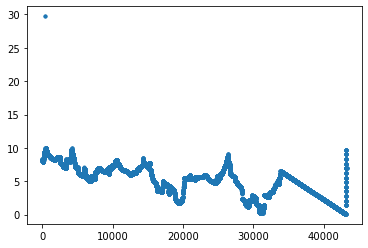

In [8]:
plt.plot(lifetime,'.')

In [7]:
# plot similar figure of lifetime distribution at different day
# selete lifetime with Judge_plume==0